# Zindi Recommendation Engine Creation

### Description
&emsp;
The project involves developing a comedy content recommendation system for a new online television channel based in Abuja. The system uses customer ratings to predict which comedy shows are most likely to appeal to each viewer. The system aims to optimize the channel's content and provide a personalized experience to viewers.
<br><br>&emsp;
The project uses a dataset containing anonymous reviews of different comedy shows held in different regions of Nigeria. Ratings range from -5 to 5, where -5 means the customer didn't like the show at all and 5 means they liked it a lot.
<br><br>&emsp;
We aim to predict customer ratings for comedy shows they have not yet seen, based on their ratings for other shows. We will define this problem as a regression problem and therefore, we will build a machine learning model to predict these evaluations.
<br><br>&emsp;
To measure the performance of the model, we will use the mean square error as an evaluation measure.

### Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

sns.set_style("whitegrid")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Exploratory Data Analysis

In [ ]:
df = train.copy()

In [ ]:
df.shape

(612702, 4)

Our dataframe contains 612702 observations and 4 columns.

In [ ]:
df.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83


Above, we have an overview of the contents of the dataframe.

In [ ]:
df.isna().sum()

Viewers_ID         0
Joke_identifier    0
Response_ID        0
Rating             0
dtype: int64

The dataframe does not contain any missing values.

In [ ]:
df.dtypes.value_counts()

object     3
float64    1
dtype: int64

The dataframe contains 3 variables containing texts and 1 variable with real values.

> We are mainly interested in the variable *Rating* which is the variable to be predicted.

In [ ]:
df.Rating.describe()

count    612702.000000
mean          0.647024
std           2.667301
min          -5.000000
25%          -1.300000
50%           0.950000
75%           2.690000
max           5.000000
Name: Rating, dtype: float64

Above, we observe the statistics of the *Rating* variable.

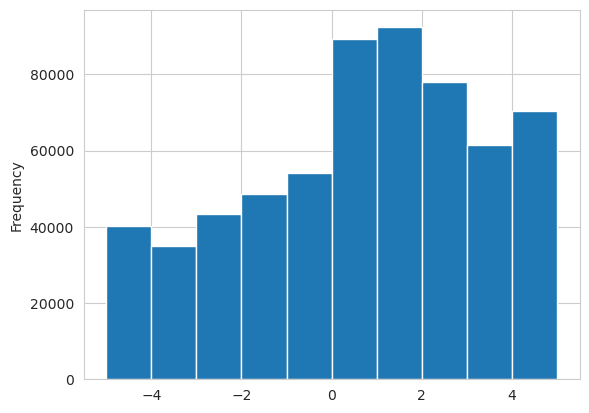

In [ ]:
df.Rating.plot.hist();

Above, we can see the distribution of the *Rating* variable. We can see that the distribution tends slightly towards positive values.

Now let's take a look at the other variables.

In [ ]:
df.select_dtypes("O").describe()

,Viewers_ID,Joke_identifier,Response_ID
count,612702,612702,612702
unique,40863,127,612702
top,A366,Klint De Drunk PH 2,A1_Klint De Drunk Enugu 1
freq,54,26311,1


Our data contains the opinions of 40863 spectators on 127 shows.  The *Response_ID* variable identifies the observation.

In [ ]:
rating_per_viewers = df[["Viewers_ID", "Rating"]].groupby("Viewers_ID").mean()
count_per_viewers = df[["Viewers_ID", "Rating"]].groupby("Viewers_ID").count()
rating_per_viewers.columns = ["Mean Rating"]
count_per_viewers.columns = ["Count Rating"]
viewers_rating = rating_per_viewers.join(count_per_viewers)

In [ ]:
viewers_rating.describe()

,Mean Rating,Count Rating
count,40863.000000,40863.000000
mean,0.310305,14.994053
std,1.661257,13.251594
min,-5.000000,2.000000
25%,-0.623333,6.000000
50%,0.394286,10.000000
75%,1.345000,19.000000
max,5.000000,54.000000


We grouped the observations by spectators and we can observe the statistics above. Some viewers only give the lowest rating and others only give the highest rating and every viewer rated at least 2 shows.

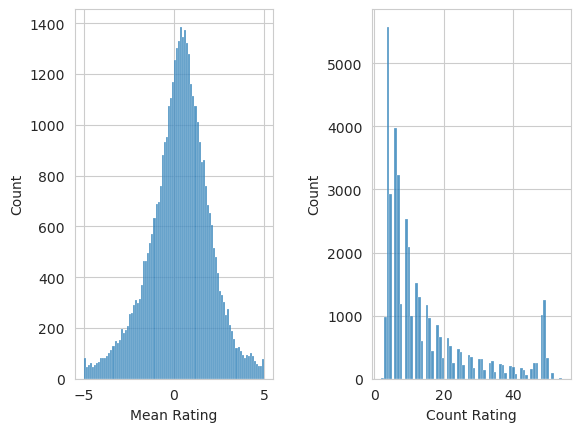

In [ ]:
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
sns.histplot(data=viewers_rating, x="Mean Rating")

plt.subplot(1, 2, 2)
sns.histplot(data=viewers_rating, x="Count Rating")

plt.show()

Above, we observe the distributions of average ratings per viewer and the number of reviews per viewer. We notice that the distribution of average ratings per spectator is quite symmetrical, while that of the number of opinions per spectator tends towards the right.

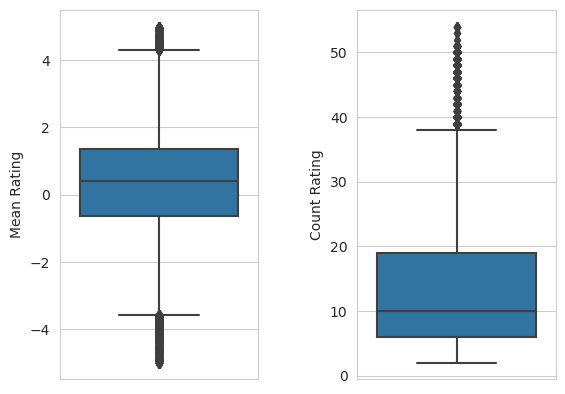

In [ ]:
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
sns.boxplot(data=viewers_rating, y="Mean Rating")

plt.subplot(1, 2, 2)
sns.boxplot(data=viewers_rating, y="Count Rating")

plt.show()

Box plots allow us to highlight outliers. The outlier values in the *Mean Rating* variable represent spectators who mostly gave only very bad ratings or only very good ratings. Outliers in the *Count Rating* variable represent very active viewers on the platform.

In [ ]:
rating_per_show = df[["Joke_identifier", "Rating"]].groupby("Joke_identifier").mean()
count_per_show = df[["Joke_identifier", "Rating"]].groupby("Joke_identifier").count()
rating_per_show.columns = ["Mean Rating"]
count_per_show.columns = ["Count Rating"]
show_rating = rating_per_show.join(count_per_show)

In [ ]:
show_rating.describe()

,Mean Rating,Count Rating
count,127.000000,127.000000
mean,0.692021,4824.425197
std,1.005727,6200.496560
min,-3.190000,1.000000
25%,0.145222,197.500000
50%,0.914000,3319.000000
75%,1.435673,5924.500000
max,2.776667,26311.000000


By grouping the observations by show, we observe the statistics above. It can be seen that some shows are very popular, while others are only rated once. We can also see that the average ratings per show vary between -3.19 and 2.78.

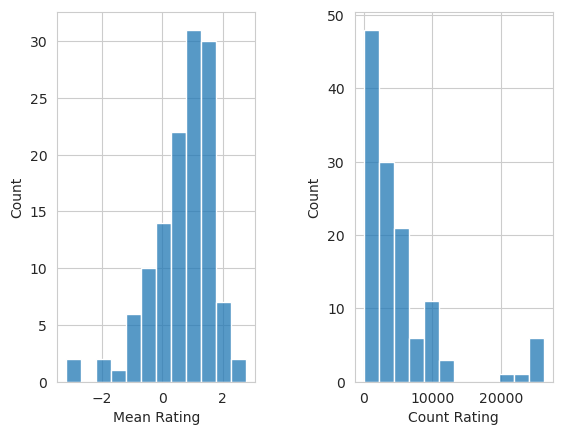

In [ ]:
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
sns.histplot(data=show_rating, x="Mean Rating")

plt.subplot(1, 2, 2)
sns.histplot(data=show_rating, x="Count Rating")

plt.show()

Above, we observe the distributions of average ratings per show and the number of reviews per show. We note that the distribution of average ratings per show is slightly skewed to the left, while that of the number of reviews per show is skewed to the right.

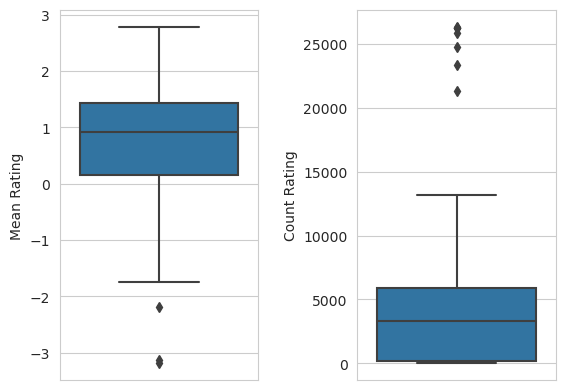

In [ ]:
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
sns.boxplot(data=show_rating, y="Mean Rating")

plt.subplot(1, 2, 2)
sns.boxplot(data=show_rating, y="Count Rating")

plt.show()

Box plots allow us to highlight outliers. Outliers in the *Mean Rating* variable represent shows with significantly worse ratings than others. Outliers in the *Count Rating* variable represent very popular shows.

## Model

We will now try out several models for prediction.
> The models we obtain will then be testedusing the test set given byn Zindi

In [3]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import TargetEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
feat_col = ["Viewers_ID", "Joke_identifier"]

X_Train = train.drop(columns=["Rating"])
y_Train = train.Rating

In [5]:
encoder = TargetEncoder()
encoder.fit(X_Train[feat_col], y_Train)

class CustomTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return encoder.transform(X)

In [6]:
preprocess = make_column_transformer(
    (CustomTransformer(), feat_col),
)

#### Linear Regression

In [ ]:
model = make_pipeline(
    preprocess,
    LinearRegression()
)

score = cross_val_score(
    estimator=model,
    X=X_Train,
    y=y_Train,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
).mean()

print("Linear Regression MSE:", -score)

Linear Regression MSE: 4.22272897262117


#### Ridge Regression

In [ ]:
model = make_pipeline(
    preprocess,
    Ridge()
)

alphas = {"ridge__alpha": np.arange(0.1, 5.0, 0.1)}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=alphas,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    n_jobs=-1
)

grid_search.fit(X_Train, y_Train)
print(f"Ridge({grid_search.best_params_}) MSE:", -grid_search.best_score_)

Ridge({'ridge__alpha': 4.9}) MSE: 4.22272896297701


#### Random Forest Regressor

In [7]:
X_Trans = preprocess.fit_transform(X_Train)

model = RandomForestRegressor(random_state=42)

params = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [5, 10, 15],
}


grid_search = GridSearchCV(
    model,
    params,
    n_jobs=-1,
    scoring=make_scorer(mean_squared_error,greater_is_better=False)
)

grid_search.fit(X_Trans, y_Train)
print(f"Random Forest({grid_search.best_params_}) MSE:", -grid_search.best_score_)

Random Forest({'max_depth': 10, 'n_estimators': 200}) MSE: 4.174232542537084


#### AdaBoost Regressor

In [9]:
X_Trans = preprocess.fit_transform(X_Train)

model = AdaBoostRegressor(random_state=42)

params = {
    "n_estimators": [25, 50, 75],
}


grid_search = GridSearchCV(
    model,
    params,
    n_jobs=-1,
    scoring = make_scorer(mean_squared_error,greater_is_better=False)
)

grid_search.fit(X_Trans, y_Train)
print(f"AdaBoost({grid_search.best_params_}) MSE:", -grid_search.best_score_)

AdaBoost({'n_estimators': 25}) MSE: 4.803505598996879
